In [30]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sb

In [31]:
# 1. Create a DataFrame for the Presidential Election data. 
file_path = Path("prim_gen_joined.csv")
ml_df = pd.read_csv(file_path)
ml_df.head()

,Voter_ID,City,Zip_Code,Party,Birth_Year,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,2012_Primary_Election,2012_General_Election,2008_Primary_Election,2008_General_Election
0,704844,SEVEN HILLS,44131,NOPTY,1959,0,t,D,t,0,t,D,t
1,1658758,PARMA,44130,REP,1968,0,t,R,t,R,t,D,t
2,2005536,BROADVIEW HTS,44147,REP,1976,0,t,R,t,R,t,D,t
3,2465762,SOLON,44139,NOPTY,1991,0,f,0,f,0,t,0,f
4,710633,INDEPENDENCE,44131,REP,1968,0,t,R,t,R,t,0,t


## Data Cleaning

In [33]:
#Replace True and False Values with 0 and 1
ml_df.replace(('f', 't'), (0, 1), inplace=True)

In [34]:
ml_df.shape

(873951, 13)

In [36]:
#Column Datatypes
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873951 entries, 0 to 873950
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Voter_ID               873951 non-null  int64 
 1   City                   873951 non-null  object
 2   Zip_Code               873951 non-null  int64 
 3   Party                  873951 non-null  object
 4   Birth_Year             873951 non-null  int64 
 5   2020_Primary_Election  873951 non-null  object
 6   2020_General_Election  873951 non-null  int64 
 7   2016_Primary_Election  873951 non-null  object
 8   2016_General_Election  873951 non-null  int64 
 9   2012_Primary_Election  873951 non-null  object
 10  2012_General_Election  873951 non-null  int64 
 11  2008_Primary_Election  873951 non-null  object
 12  2008_General_Election  873951 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 86.7+ MB


In [37]:
# Set voter_id_org column as index
ml_df =ml_df.set_index('Voter_ID')

In [43]:
# ml_df["2020_Primary_Election"].unique()
ml_df["2016_Primary_Election"].unique()
# ml_df["2012_Primary_Election"].unique()
# ml_df["2008_Primary_Election"].unique()

array(['D', 'R', '0', 'N', ' ', 'G', 'X'], dtype=object)

In [47]:
# Hand categorical data
# code primary election data into integers
#D is Democrat, R is Republican, L is Libertarian, G is Green, 0, " ", X and N is non-party, issues only ballot

party={"D": 0, "R": 1, "L": 2, "0": 3}
ml_df['2020_Primary_Election'] = ml_df['2020_Primary_Election'].apply(lambda x:party[x])
ml_df['2020_Primary_Election']

Voter_ID
704844     3
1658758    3
2005536    3
2465762    3
710633     3
          ..
689381     0
823935     1
749942     3
276903     3
3017222    3
Name: 2020_Primary_Election, Length: 873951, dtype: int64

In [48]:
party={"D": 0, "R": 1, "L": 2, "0": 3, "N": 3, " ": 3, "G": 4, "X": 3}
ml_df['2016_Primary_Election'] = ml_df['2016_Primary_Election'].apply(lambda x:party[x])
ml_df['2012_Primary_Election'] = ml_df['2012_Primary_Election'].apply(lambda x:party[x])
ml_df['2008_Primary_Election'] = ml_df['2008_Primary_Election'].apply(lambda x:party[x])


In [49]:
ml_df.head()

,City,Zip_Code,Party,Birth_Year,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,2012_Primary_Election,2012_General_Election,2008_Primary_Election,2008_General_Election
Voter_ID,,,,,,,,,,,,
704844,SEVEN HILLS,44131,NOPTY,1959,3,1,0,1,3,1,0,1
1658758,PARMA,44130,REP,1968,3,1,1,1,1,1,0,1
2005536,BROADVIEW HTS,44147,REP,1976,3,1,1,1,1,1,0,1
2465762,SOLON,44139,NOPTY,1991,3,0,3,0,3,1,3,0
710633,INDEPENDENCE,44131,REP,1968,3,1,1,1,1,1,3,1


In [50]:
ml_df["Party"].unique()

array(['NOPTY', 'REP', 'DEM', 'GRE', 'LIB'], dtype=object)

In [52]:
# Handle Categorical "Party" columns
P_ID = {"DEM": 0, "REP": 1,"LIB": 2, "NOPTY": 3, "GRE": 4}
ml_df["Party"] = ml_df["Party"].apply(lambda x:P_ID[x])
ml_df.head()

,City,Zip_Code,Party,Birth_Year,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,2012_Primary_Election,2012_General_Election,2008_Primary_Election,2008_General_Election
Voter_ID,,,,,,,,,,,,
704844,SEVEN HILLS,44131,3,1959,3,1,0,1,3,1,0,1
1658758,PARMA,44130,1,1968,3,1,1,1,1,1,0,1
2005536,BROADVIEW HTS,44147,1,1976,3,1,1,1,1,1,0,1
2465762,SOLON,44139,3,1991,3,0,3,0,3,1,3,0
710633,INDEPENDENCE,44131,1,1968,3,1,1,1,1,1,3,1


In [27]:
# Establish the generation bins and group names.

generation_bins = [0, 1945, 1964, 1980, 1996, 2014]
group_names = ["Silent","Boomers", "Generation X", "Millenials", "Generation Z"]

# Categorize spending based on the bins.
random_df["Generational_Groups"] = pd.cut(random_df["Birth_Year"], generation_bins, labels=group_names)

random_df.head()

,City,Zip_Code,Party,Birth_Year,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,2012_Primary_Election,2012_General_Election,2008_Primary_Election,2008_General_Election,Generational_Groups
Voter_ID,,,,,,,,,,,,,
704844,SEVEN HILLS,44131,NOPTY,1959,0,1,D,1,0,1,D,1,Boomers
1658758,PARMA,44130,REP,1968,0,1,R,1,R,1,D,1,Generation X
2005536,BROADVIEW HTS,44147,REP,1976,0,1,R,1,R,1,D,1,Generation X
2465762,SOLON,44139,NOPTY,1991,0,0,0,0,0,1,0,0,Millenials
710633,INDEPENDENCE,44131,REP,1968,0,1,R,1,R,1,0,1,Generation X


In [53]:
ml_df["City"].unique()

array(['SEVEN HILLS', 'PARMA', 'BROADVIEW HTS', 'SOLON', 'INDEPENDENCE',
       'EUCLID', 'CLEVELAND HTS', 'GARFIELD HTS', 'CLEVELAND',
       'ROCKY RIVER', 'WESTLAKE', 'ORANGE', 'PEPPER PIKE', 'MAPLE HTS',
       'EAST CLEVELAND', 'BROOK PARK', 'NORTH ROYALTON', 'HIGHLAND HTS',
       'WARRENSVILLE HTS', 'FAIRVIEW PARK', 'SOUTH EUCLID', 'BEREA',
       'MIDDLEBURG HTS', 'LAKEWOOD', 'LYNDHURST', 'SHAKER HTS',
       'BROOKLYN', 'OLMSTED FALLS', 'UNIVERSITY HTS', 'GATES MILLS',
       'MAYFIELD HTS', 'PARMA HTS', 'BEACHWOOD', 'RICHMOND HTS',
       'BRECKSVILLE', 'BEDFORD', 'BEDFORD HTS', 'OAKWOOD',
       'NORTH OLMSTED', 'OLMSTED TWP', 'STRONGSVILLE', 'BROOKLYN HTS',
       'NEWBURGH HTS', 'BAY VILLAGE', 'MORELAND HILLS', 'WALTON HILLS',
       'CUYAHOGA HTS', 'VALLEY VIEW', 'MAYFIELD VILLAGE', 'BENTLEYVILLE',
       'GLENWILLOW', 'CHAGRIN FALLS', 'HUNTING VALLEY', 'BRATENAHL',
       'WOODMERE', 'HIGHLAND HILLS', 'NORTH RANDALL', 'LINNDALE',
       'CHAGRIN FALLS TWP'], dtype=object

In [55]:
# Code the cities to unique #s
cities = {'SEVEN HILLS': 1, 'PARMA': 2, 'BROADVIEW HTS': 3, 'SOLON': 4, 'INDEPENDENCE': 5,
       'EUCLID': 6, 'CLEVELAND HTS': 7, 'GARFIELD HTS': 8, 'CLEVELAND': 9,
       'ROCKY RIVER': 10, 'WESTLAKE': 11, 'ORANGE': 12, 'PEPPER PIKE':13, 'MAPLE HTS':14,
       'EAST CLEVELAND':15, 'BROOK PARK':16, 'NORTH ROYALTON':17, 'HIGHLAND HTS':18,
       'WARRENSVILLE HTS':19, 'FAIRVIEW PARK':20, 'SOUTH EUCLID':21, 'BEREA':22,
       'MIDDLEBURG HTS':23, 'LAKEWOOD':24, 'LYNDHURST':25, 'SHAKER HTS':25,
       'BROOKLYN':27, 'OLMSTED FALLS':28, 'UNIVERSITY HTS':29, 'GATES MILLS':30,
       'MAYFIELD HTS':31, 'PARMA HTS':32, 'BEACHWOOD':33, 'RICHMOND HTS':33,
       'BRECKSVILLE':34, 'BEDFORD':35, 'BEDFORD HTS':36, 'OAKWOOD':37,
       'NORTH OLMSTED':38, 'OLMSTED TWP':39, 'STRONGSVILLE':40, 'BROOKLYN HTS':41,
       'NEWBURGH HTS':42, 'BAY VILLAGE':43, 'MORELAND HILLS':44, 'WALTON HILLS':45,
       'CUYAHOGA HTS':46, 'VALLEY VIEW':47, 'MAYFIELD VILLAGE':48, 'BENTLEYVILLE':49,
       'GLENWILLOW':50, 'CHAGRIN FALLS':51, 'HUNTING VALLEY':52, 'BRATENAHL':53,
       'WOODMERE':54, 'HIGHLAND HILLS':55, 'NORTH RANDALL':56, 'LINNDALE': 57,
       'CHAGRIN FALLS TWP': 58}

ml_df["City"] = ml_df["City"].apply(lambda x:cities[x])
ml_df.head()


,City,Zip_Code,Party,Birth_Year,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,2012_Primary_Election,2012_General_Election,2008_Primary_Election,2008_General_Election
Voter_ID,,,,,,,,,,,,
704844,1,44131,3,1959,3,1,0,1,3,1,0,1
1658758,2,44130,1,1968,3,1,1,1,1,1,0,1
2005536,3,44147,1,1976,3,1,1,1,1,1,0,1
2465762,4,44139,3,1991,3,0,3,0,3,1,3,0
710633,5,44131,1,1968,3,1,1,1,1,1,3,1


In [56]:
# Establish the generation bins and group names.

generation_bins = [0, 1945, 1964, 1980, 1996, 2014]
group_names = ["Silent","Boomers", "Generation X", "Millenials", "Generation Z"]

# Categorize spending based on the bins.
ml_df["Generational_Groups"] = pd.cut(ml_df["Birth_Year"], generation_bins, labels=group_names)

ml_df.head()

,City,Zip_Code,Party,Birth_Year,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,2012_Primary_Election,2012_General_Election,2008_Primary_Election,2008_General_Election,Generational_Groups
Voter_ID,,,,,,,,,,,,,
704844,1,44131,3,1959,3,1,0,1,3,1,0,1,Boomers
1658758,2,44130,1,1968,3,1,1,1,1,1,0,1,Generation X
2005536,3,44147,1,1976,3,1,1,1,1,1,0,1,Generation X
2465762,4,44139,3,1991,3,0,3,0,3,1,3,0,Millenials
710633,5,44131,1,1968,3,1,1,1,1,1,3,1,Generation X


In [58]:
# Number Generational Bins
group = {"Silent": 1,"Boomers": 2, "Generation X": 3, "Millenials": 4, "Generation Z": 5}
ml_df["Generational_Groups"] = ml_df["Generational_Groups"].apply(lambda x:group[x])
ml_df.head()


,City,Zip_Code,Party,Birth_Year,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,2012_Primary_Election,2012_General_Election,2008_Primary_Election,2008_General_Election,Generational_Groups
Voter_ID,,,,,,,,,,,,,
704844,1,44131,3,1959,3,1,0,1,3,1,0,1,2
1658758,2,44130,1,1968,3,1,1,1,1,1,0,1,3
2005536,3,44147,1,1976,3,1,1,1,1,1,0,1,3
2465762,4,44139,3,1991,3,0,3,0,3,1,3,0,4
710633,5,44131,1,1968,3,1,1,1,1,1,3,1,3


In [59]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873951 entries, 704844 to 3017222
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   City                   873951 non-null  int64   
 1   Zip_Code               873951 non-null  int64   
 2   Party                  873951 non-null  int64   
 3   Birth_Year             873951 non-null  int64   
 4   2020_Primary_Election  873951 non-null  int64   
 5   2020_General_Election  873951 non-null  int64   
 6   2016_Primary_Election  873951 non-null  int64   
 7   2016_General_Election  873951 non-null  int64   
 8   2012_Primary_Election  873951 non-null  int64   
 9   2012_General_Election  873951 non-null  int64   
 10  2008_Primary_Election  873951 non-null  int64   
 11  2008_General_Election  873951 non-null  int64   
 12  Generational_Groups    873951 non-null  category
dtypes: category(1), int64(12)
memory usage: 87.5 MB


In [108]:
ml_df["Birth_Year"].value_counts()

1990    18098
1991    18025
1992    17816
1993    17563
1989    17524
        ...  
1904        1
1903        1
1800        1
1905        1
1909        1
Name: Birth_Year, Length: 102, dtype: int64

In [60]:
corr_matrix = ml_df.corr()
corr_matrix['2020_General_Election'].sort_values(ascending=False)

2020_General_Election    1.000000
2016_General_Election    0.433628
2012_General_Election    0.339424
2008_General_Election    0.333689
City                     0.109255
Zip_Code                 0.051316
2012_Primary_Election   -0.240198
Birth_Year              -0.273879
2008_Primary_Election   -0.285655
2020_Primary_Election   -0.306709
2016_Primary_Election   -0.334905
Party                   -0.389660
Name: 2020_General_Election, dtype: float64

In [97]:
# ml_df['2020percent'] = (ml_df['2020_General_Election'].avg() / 
#                   ml_df['2020_General_Election'].count()) * 100
# ml_df[['City','2020percent']].groupby(["City"], as_index=True).sort_values(by="2020percent", ascending=False)

# Calculate the average test scores.
per_city= ml_df.groupby(["City"]).mean()["2020_General_Election"]*100
per_city
# ml_df[["City", "2020_General_Election"]].groupby((["City"]).mean()["2020_General_Election"]*100, as_index=True)

# per_school_reading = school_data_complete_df.groupby(["school_name"]).mean()["reading_score"]

City
1     81.536904
2     73.504290
3     78.726503
4     81.093794
5     84.871664
6     66.826397
7     72.376407
8     63.917749
9     55.120094
10    80.874618
11    79.702650
12    83.920474
13    84.939316
14    64.419171
15    50.082468
16    67.857143
17    78.282966
18    85.794697
19    63.707296
20    82.003054
21    75.046211
22    76.237068
23    79.807692
24    74.582711
25    78.819938
27    70.836718
28    78.256824
29    75.488874
30    83.136095
31    74.653589
32    68.375161
33    77.080308
34    84.959574
35    68.369418
36    69.698173
37    76.580621
38    76.898043
39    78.861542
40    80.353687
41    85.587189
42    62.910798
43    84.613521
44    84.704711
45    84.041332
46    72.530120
47    85.604113
48    84.392157
49    83.554377
50    77.741408
51    78.138591
52    81.936685
53    83.425852
54    68.595041
55    72.815534
56    67.286822
57    41.666667
58    78.378378
Name: 2020_General_Election, dtype: float64

In [71]:
ml_df[["City", "2020_General_Election"]].groupby(["City"], as_index=True).sum().sort_values(by="2020_General_Election", ascending=False)


,2020_General_Election
City,
9,135214
2,37779
24,27480
40,26990
25,26076
7,24566
6,22592
11,19728
17,17252


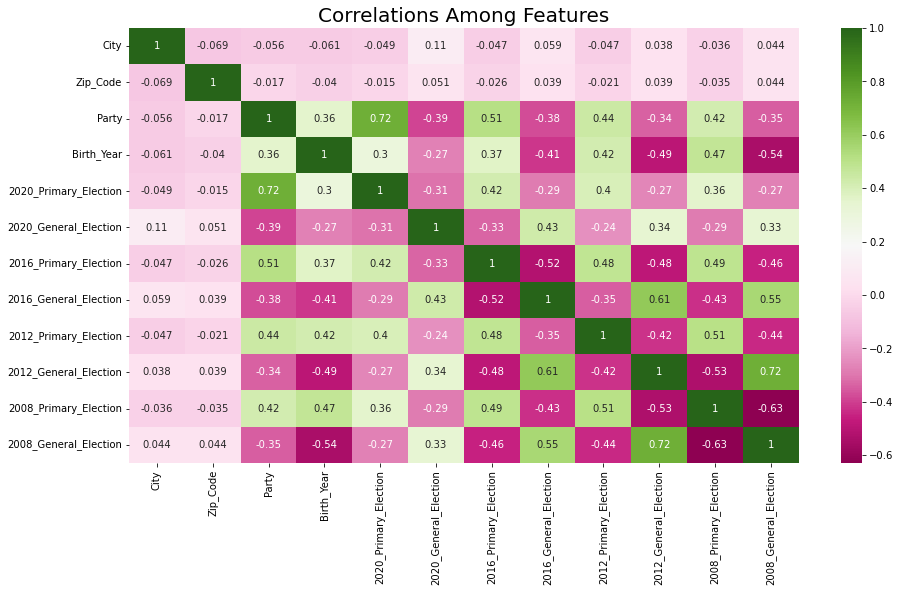

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize = (15,8))
sb.heatmap(ml_df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

<AxesSubplot:xlabel='City', ylabel='2020_General_Election'>

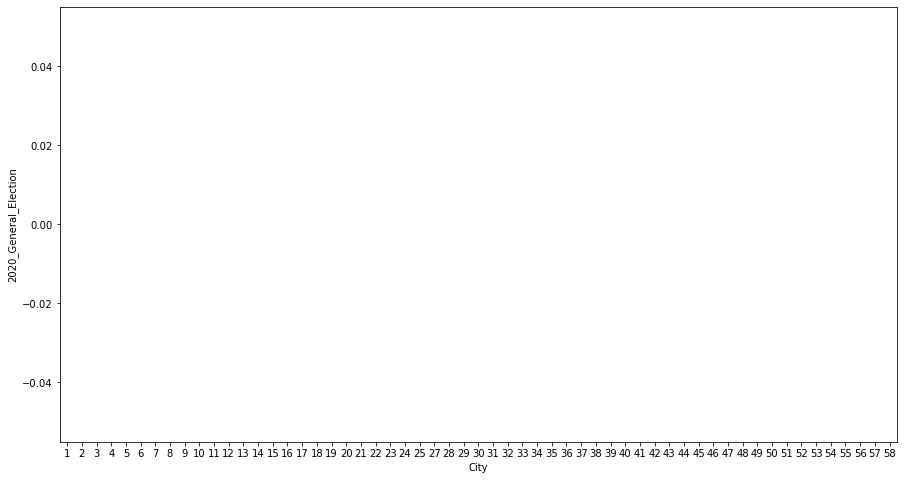

In [91]:
plt.subplots(figsize = (15,8))
sb.barplot(x = "City", y = per_city, data=ml_df, edgecolor=(0,0,0), linewidth=2)
# plt.title("Voting By City Distribution", fontsize = 15)
# plt.ylabel("2020_General_Election", fontsize = 15)
# plt.xlabel("Cities",fontsize = 15)
# plt.xticks("City")

In [115]:
ml_df = ml_df.drop(['percent', '2020percent'], axis=1)
ml_df.head()

,City,Zip_Code,Party,Birth_Year,2020_Primary_Election,2020_General_Election,2016_Primary_Election,2016_General_Election,2012_Primary_Election,2012_General_Election,2008_Primary_Election,2008_General_Election,Generational_Groups
Voter_ID,,,,,,,,,,,,,
704844,1,44131,3,1959,3,1,0,1,3,1,0,1,2
1658758,2,44130,1,1968,3,1,1,1,1,1,0,1,3
2005536,3,44147,1,1976,3,1,1,1,1,1,0,1,3
2465762,4,44139,3,1991,3,0,3,0,3,1,3,0,4
710633,5,44131,1,1968,3,1,1,1,1,1,3,1,3


In [119]:
ml_df  = ml_df[ml_df['Birth_Year'] >= 1928]
ml_df['Birth_Year'].describe()

count    870075.000000
mean       1972.083349
std          18.475903
min        1928.000000
25%        1957.000000
50%        1973.000000
75%        1988.000000
max        2004.000000
Name: Birth_Year, dtype: float64

In [120]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870075 entries, 704844 to 3017222
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   City                   870075 non-null  int64   
 1   Zip_Code               870075 non-null  int64   
 2   Party                  870075 non-null  int64   
 3   Birth_Year             870075 non-null  int64   
 4   2020_Primary_Election  870075 non-null  int64   
 5   2020_General_Election  870075 non-null  int64   
 6   2016_Primary_Election  870075 non-null  int64   
 7   2016_General_Election  870075 non-null  int64   
 8   2012_Primary_Election  870075 non-null  int64   
 9   2012_General_Election  870075 non-null  int64   
 10  2008_Primary_Election  870075 non-null  int64   
 11  2008_General_Election  870075 non-null  int64   
 12  Generational_Groups    870075 non-null  category
dtypes: category(1), int64(12)
memory usage: 87.1 MB


In [121]:
x = ml_df.drop("2020_General_Election",axis=1)
y = ml_df["2020_General_Election"]

In [122]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings(action='ignore')


classifiers = [
    
    RandomForestClassifier(n_estimators=100, max_features=3),
    GradientBoostingClassifier(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [123]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_index, test_index in sss.split(x, y):
    
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

Text(0.5, 1.0, 'Classifier Accuracy')

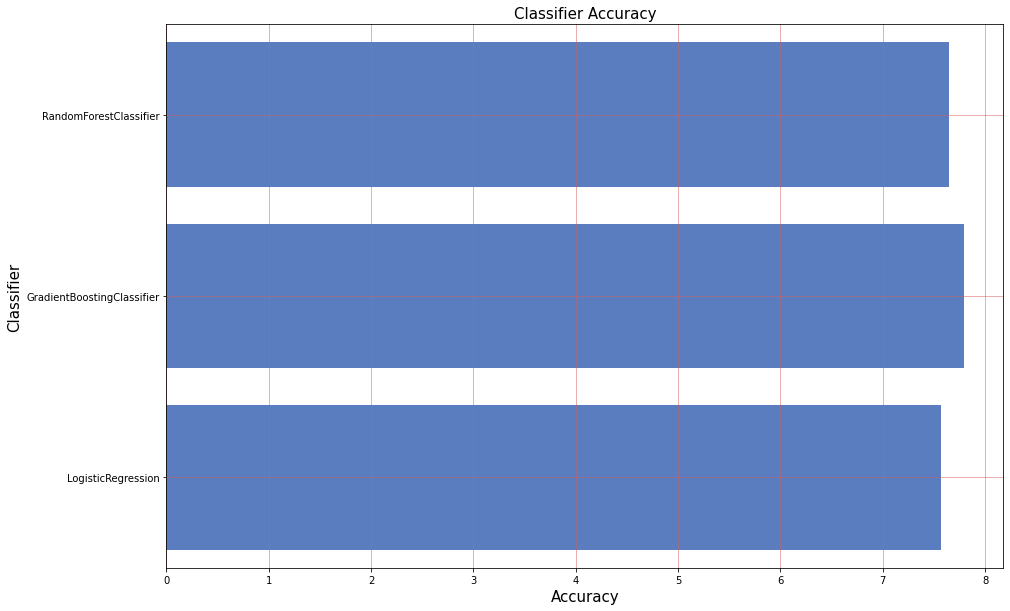

In [124]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2]])
%matplotlib inline
sb.set_color_codes("muted")
ax=plt.subplots(figsize=(15,10))
ax=sb.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=15)
plt.ylabel('Classifier',fontsize=15)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=15)


In [127]:
log['Accuracy'].sort_values(ascending=False)

1    7.789114
0    7.645315
2    7.569670
Name: Accuracy, dtype: float64

In [128]:
log['Classifier']

0        RandomForestClassifier
1    GradientBoostingClassifier
2            LogisticRegression
Name: Classifier, dtype: object

## From above results we can say that gradient boosting classifier gave the best result for our dataset

In [129]:
classifier = GradientBoostingClassifier()

In [130]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size = 0.2 , random_state = 33)

classifier.fit(X_train,Y_train)


from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier, X_train, Y_train,cv=5,
scoring="accuracy").mean()

In [131]:
score 


0.7789673304025515

##Confusion Matrices

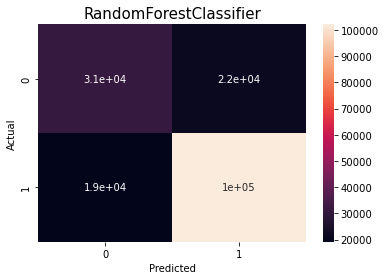

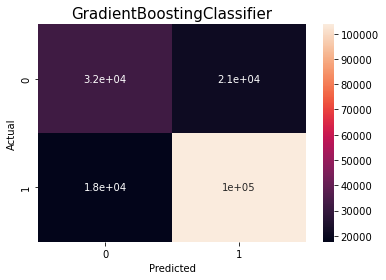

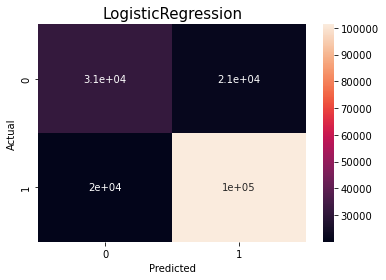

In [132]:
for classifier in classifiers:
    

    classifier.fit(X_train,Y_train)

    p_vals = classifier.predict(X_test)

    confusion_matrix = pd.crosstab(Y_test, p_vals, rownames=['Actual'], colnames=['Predicted'])

    sb.heatmap(confusion_matrix, annot=True)
    plt.title( classifier.__class__.__name__,fontsize=15)
    plt.show()